# Analysis of Stackoverflow 2023 Developer Survey

https://insights.stackoverflow.com/survey/

In [54]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [55]:
# import dataset for the survey and set the index to the unique respondent ID
df = pd.read_csv(r'C:\Users\brian\Project\Project\survey_results_public.csv', index_col='ResponseId')
df_raw=df.copy()

In [56]:
pd.set_option('display.max_columns', 85)

In [57]:
df.head()

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,For

In [58]:
df.shape

(89184, 83)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89184 entries, 1 to 89184
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Q120                                 89184 non-null  object 
 1   MainBranch                           89184 non-null  object 
 2   Age                                  89184 non-null  object 
 3   Employment                           87898 non-null  object 
 4   RemoteWork                           73810 non-null  object 
 5   CodingActivities                     73764 non-null  object 
 6   EdLevel                              87973 non-null  object 
 7   LearnCode                            87663 non-null  object 
 8   LearnCodeOnline                      70084 non-null  object 
 9   LearnCodeCoursesCert                 37076 non-null  object 
 10  YearsCode                            87435 non-null  object 
 11  YearsCodePro                     

In [61]:
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                                        1487
Python                                                                                                1132
HTML/CSS;JavaScript                                                                                    735
HTML/CSS;JavaScript;PHP;SQL                                                                            718
C#                                                                                                     649
                                                                                                      ... 
Bash/Shell (all shells);C;C#;Java;JavaScript;Perl;PHP;Python;SQL                                         1
Assembly;C;JavaScript;MATLAB;SQL                                                                         1
C#;Crystal                                                                                               1
Bash/Shell (al

In [63]:
country_grp = df.groupby(['Country'])

In [64]:
country_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Python').sum())

Country
Afghanistan                              22
Albania                                  19
Algeria                                  35
Andorra                                   5
Angola                                    4
                                       ... 
Venezuela, Bolivarian Republic of...     42
Viet Nam                                174
Yemen                                     8
Zambia                                   11
Zimbabwe                                 19
Name: LanguageHaveWorkedWith, Length: 185, dtype: int64

In [65]:
country_respondents = df['Country'].value_counts()
country_respondents

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Saint Kitts and Nevis                                       1
Marshall Islands                                            1
Samoa                                                       1
Central African Republic                                    1
San Marino                                                  1
Name: count, Length: 185, dtype: int64

In [66]:
country_uses_python = country_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
country_uses_python

Country
Afghanistan                              22
Albania                                  19
Algeria                                  35
Andorra                                   5
Angola                                    4
                                       ... 
Venezuela, Bolivarian Republic of...     42
Viet Nam                                174
Yemen                                     8
Zambia                                   11
Zimbabwe                                 19
Name: LanguageHaveWorkedWith, Length: 185, dtype: int64

In [67]:
python_df = pd.concat([country_respondents, country_uses_python], axis='columns', sort=False)
python_df

,count,LanguageHaveWorkedWith
Country,,
United States of America,18647,10062
Germany,7328,3686
India,5625,2793
United Kingdom of Great Britain and Northern Ireland,5552,2752
Canada,3507,1784
...,...,...
Saint Kitts and Nevis,1,0
Marshall Islands,1,0
Samoa,1,1


In [68]:
python_df.rename(columns={'count': 'NumRespondents', 'LanguageHaveWorkedWith': 'NumKnowsPython'}, inplace=True)

In [69]:
python_df

,NumRespondents,NumKnowsPython
Country,,
United States of America,18647,10062
Germany,7328,3686
India,5625,2793
United Kingdom of Great Britain and Northern Ireland,5552,2752
Canada,3507,1784
...,...,...
Saint Kitts and Nevis,1,0
Marshall Islands,1,0
Samoa,1,1


In [70]:
python_df['PctKnowsPython'] = (python_df['NumKnowsPython']/python_df['NumRespondents']) * 100
python_df

,NumRespondents,NumKnowsPython,PctKnowsPython
Country,,,
United States of America,18647,10062,53.960423
Germany,7328,3686,50.300218
India,5625,2793,49.653333
United Kingdom of Great Britain and Northern Ireland,5552,2752,49.567723
Canada,3507,1784,50.869689
...,...,...,...
Saint Kitts and Nevis,1,0,0.000000
Marshall Islands,1,0,0.000000
Samoa,1,1,100.000000


In [71]:
python_df.sort_values(by='PctKnowsPython', ascending=False, inplace=True)

In [72]:
python_df.head(50)

,NumRespondents,NumKnowsPython,PctKnowsPython
Country,,,
San Marino,1,1,100.000000
North Korea,4,4,100.000000
Samoa,1,1,100.000000
Liechtenstein,1,1,100.000000
Grenada,1,1,100.000000
"Congo, Republic of the...",2,2,100.000000
Dominica,2,2,100.000000
Saint Lucia,2,2,100.000000
Lesotho,4,4,100.000000


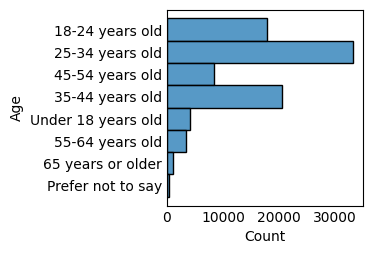

In [73]:
age_plot = sns.histplot(data=df,y="Age")

In [74]:
remote= df.RemoteWork.value_counts()
remote

RemoteWork
Hybrid (some remote, some in-person)    31131
Remote                                  30566
In-person                               12113
Name: count, dtype: int64

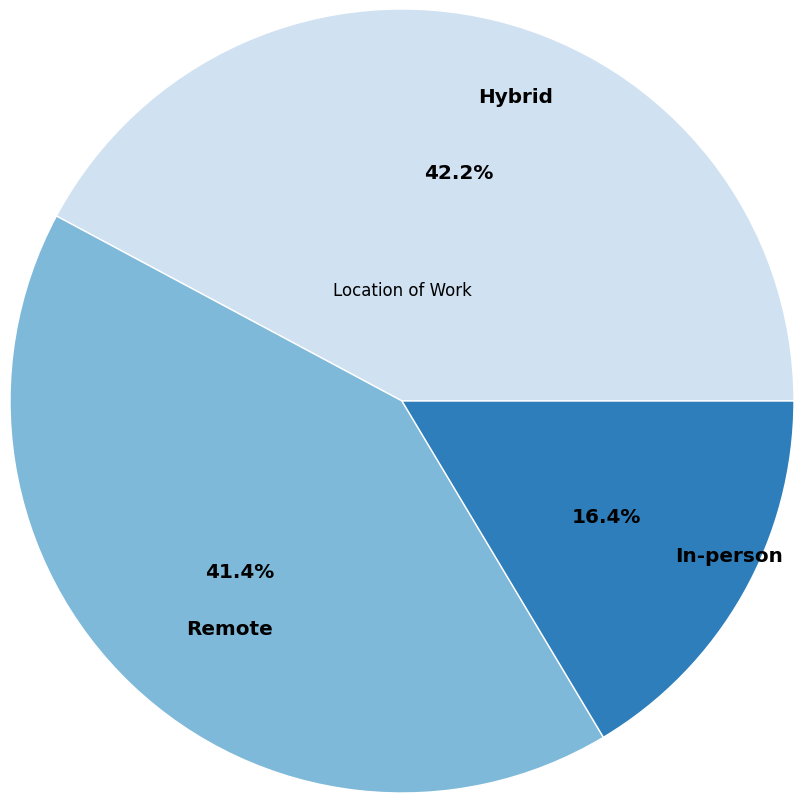

In [75]:

plt.style.use('_mpl-gallery-nogrid')



colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(remote)))

# plot
fig, ax = plt.subplots()
ax.pie(remote, colors=colors, radius=5, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,
       textprops=dict(size="x-large",weight='bold'),
       labels=['Hybrid','Remote','In-person'],autopct='%1.1f%%',labeldistance=.8)

ax.set_title("Location of Work")


plt.show()

In [76]:
country= df.Country.value_counts()
top_20 = country[:20]

In [77]:
counts = top_20.reset_index().rename(columns={"index": "value", 0: "count"})

In [78]:

counts.replace("United Kingdom of Great Britain and Northern Ireland","United Kingdom",inplace=True)


In [79]:
counts['user_percent']= counts['count'].apply(lambda x: (x/87973)*100)

In [80]:
counts

,Country,count,user_percent
0,United States of America,18647,21.196276
1,Germany,7328,8.329828
2,India,5625,6.394007
3,United Kingdom,5552,6.311027
4,Canada,3507,3.986450
5,France,2933,3.333977
6,Poland,2435,2.767895
7,Netherlands,2383,2.708786
8,Australia,2078,2.362088
9,Brazil,2042,2.321167


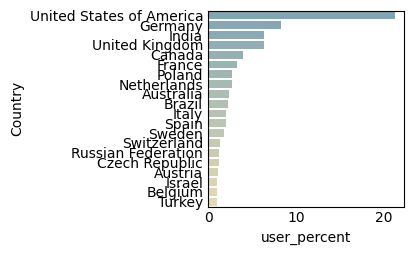

In [81]:
country_plot = sns.barplot(data=counts,y='Country',x='user_percent',palette="blend:#7AB,#EDA")


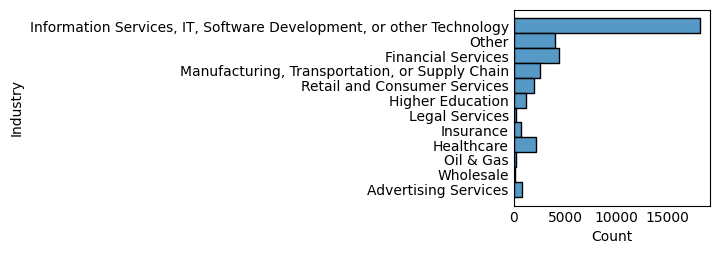

In [83]:
ind_plot = sns.histplot(data=df,y="Industry")

In [84]:

indy= df.Industry.value_counts()
indy_counts = indy.reset_index().rename(columns={"index": "value", 0: "count"})

In [85]:
indy_counts

,Industry,count
0,"Information Services, IT, Software Development...",18159
1,Financial Services,4421
2,Other,4011
3,"Manufacturing, Transportation, or Supply Chain",2607
4,Healthcare,2216
5,Retail and Consumer Services,1955
6,Higher Education,1242
7,Advertising Services,786
8,Insurance,707
9,Oil & Gas,276


In [88]:

us_curr = df['Currency']== 'USD\tUnited States dollar'

In [89]:
us_comp = df.ConvertedCompYearly.describe().apply(lambda x: format(x, 'f'))
us_comp

count       48019.000000
mean       103110.081718
std        681418.838712
min             1.000000
25%         43907.000000
50%         74963.000000
75%        121641.000000
max      74351432.000000
Name: ConvertedCompYearly, dtype: object

In [90]:
max= df.ConvertedCompYearly.max()

In [93]:
df.nlargest(20,'ConvertedCompYearly')

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
53269,I agree,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em...","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Boots...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Friend or family member;Online Courses or Cert...,Formal documentation provided by the owner of ...,NaN,3,Less than 1 year,"Developer, full-stack",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,Canada,CAD\tCanadian dollar,1.000000e+08,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,Assembly;C;HTML/CSS;JavaScript;PHP;PowerShell;...,NaN,NaN,NaN,NaN,WordPress,Node.js;WordPress,SwiftUI,OpenGL;SwiftUI,NaN,NaN,Xcode,Xcode,Android;ChromeOS;iOS;iPadOS;MacOS;Other Linux-...,Android;iOS;iPadOS;MacOS;Other Linux-based;Win...,NaN,NaN,Microsoft Teams;Zoom,Microsoft Teams;Zoom,NaN,NaN,NaN,NaN,Stack Overflow;Stack Exchange,Daily or almost daily,No,NaN,"No, not really","OK,I guess. Maybe DeepAI or ChatGPT. Probably ...","No, but I plan to soon",Favorable,NaN,Somewhat trust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,7.0,Agree,Disagree,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,Developer portal or other central places to fi...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,74351432.0
77849,I agree,I am a developer by profession,35-44 years old,I prefer not to say,NaN,NaN,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Codecademy;edX;Udemy;Pluralsight;Coursera;Udac...,19,25,NaN,"10,000 or more employees",I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,South Africa,CAD\tCanadian dollar,9.900000e+07,Ada;Apex;APL;Assembly;Bash/Shell (all shells);...,Ada;Apex;APL;Assembly;Bash/Shell (all shells);...,BigQuery;Cassandra;Clickhouse;Cloud Firestore;...,BigQuery;Cassandra;Clickhouse;Cloud Firestore;...,Amazon Web Services (AWS);Cloudflare;Colocatio...,Amazon Web Services (AWS);Cloudflare;Colocatio...,Angular;AngularJS;ASP.NET;ASP.NET CORE;Blazor;...,Angular;AngularJS;ASP.NET;ASP.NET CORE;Blazor;...,.NET (5+) ;.NET Framework (1.0 - 4.8);Apache K...,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAU...,Boost.Test;build2;Bun;Chocolatey;CMake;Compose...,Boost.Test;build2;Bun;Chocolatey;CMake;Co